<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Electric-Vehicle(EV)-chargepoints-in-England" data-toc-modified-id="Predicting-Electric-Vehicle(EV)-chargepoints-in-England-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Electric Vehicle(EV) chargepoints in England</a></span><ul class="toc-item"><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Splitting-dataframe-into-features-and-target-|-converting-target-to-binary-for-classification" data-toc-modified-id="Splitting-dataframe-into-features-and-target-|-converting-target-to-binary-for-classification-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Splitting dataframe into features and target | converting target to binary for classification</a></span><ul class="toc-item"><li><span><a href="#Train-test-split-(80%-Train,-20%-Test)" data-toc-modified-id="Train-test-split-(80%-Train,-20%-Test)-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Train-test-split (80% Train, 20% Test)</a></span></li></ul></li><li><span><a href="#Building-classifier-pipeline" data-toc-modified-id="Building-classifier-pipeline-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Building classifier pipeline</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Gaussian-Naive-Bayes" data-toc-modified-id="Gaussian-Naive-Bayes-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Gaussian Naive Bayes</a></span></li><li><span><a href="#Support-Vectors-(Linear-Model)" data-toc-modified-id="Support-Vectors-(Linear-Model)-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Support Vectors (Linear Model)</a></span></li><li><span><a href="#Support-Vectors-(Radial-Based)" data-toc-modified-id="Support-Vectors-(Radial-Based)-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Support Vectors (Radial Based)</a></span></li><li><span><a href="#K-Nearest-Neighbours" data-toc-modified-id="K-Nearest-Neighbours-1.1.8"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>K Nearest Neighbours</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.1.9"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-1.1.10"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#Boosting-Models" data-toc-modified-id="Boosting-Models-1.1.11"><span class="toc-item-num">1.1.11&nbsp;&nbsp;</span>Boosting Models</a></span></li></ul></li></ul></li></ul></div>

# Predicting Electric Vehicle(EV) chargepoints in England
## Modelling

In [68]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import joblib
import pickle

# Sklearn packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix

from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("../data/processed/full_processed_data.csv")\

df.head()

,msoa11cd,msoa11nm,lad13cd,lad13nm,income_score,employment_score,idaci_score,idaopi_score,adultskills_score,health_score,...,elec_d_con_mdn,elec_nd_con,nd_meters,elec_nd_con_mean,elec_nd_con_mdn,residential_ratio,residential_meter_ratio,residential_mdn_ratio,metropolitan,charge_points
0,E02006765,Wychavon 018,E07000238,Wychavon,-0.605381,-0.573660,-0.637344,-0.902425,-0.217255,-0.836885,...,1.017437,0.685358,0.519989,-0.305450,-0.400422,-0.696956,-0.823383,0.896452,0.0,6.0
1,E02006869,Sheffield 076,E08000019,Sheffield,0.346551,0.581285,0.225006,0.495515,0.865269,0.722658,...,-0.663149,-0.825844,-0.352399,0.852006,1.267850,1.225788,0.884991,-1.552253,1.0,0.0
2,E02006774,Wyre Forest 008,E07000239,Wyre Forest,0.274137,0.279842,0.104888,0.287807,0.408271,0.034357,...,-0.030677,-0.620824,-1.015851,-1.369678,-1.227389,0.641165,1.133435,1.119902,0.0,0.0
3,E02000996,Bolton 013,E08000001,Bolton,1.922412,2.012535,1.799706,1.343843,1.607318,1.823455,...,-0.045924,-1.215959,-1.019551,0.271194,0.405159,1.355991,1.184134,-0.464230,1.0,0.0
4,E02006606,Mid Sussex 003,E07000228,Mid Sussex,-1.616707,-2.045091,-1.505672,-1.429771,-0.683208,-2.137470,...,0.482730,-1.200421,-1.444683,-1.112559,-0.868930,1.468005,1.585986,1.041607,0.0,0.0


### Splitting dataframe into features and target | converting target to binary for classification

In [7]:
X = df.drop(['charge_points'], axis=1)
X = X.loc[:, 'income_score':]
y = df.charge_points.apply(lambda x: 1 if x > 0 else 0).values

In [8]:
pd.DataFrame(y.reshape(-1,1)).iloc[:,0].value_counts(normalize=True)

0    0.556766
1    0.443234
Name: 0, dtype: float64

#### Train-test-split (80% Train, 20% Test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True, stratify=y)

### Building classifier pipeline

In [15]:
#Function for executing preprocessing steps then running a classifier of choice
def model_run(model,X_train,y_train,X_test,y_test):
    classifier_pipeline = make_pipeline(
    model)
    classifier_pipeline.fit(X_train,y_train)
    train =classifier_pipeline.score(X_train,y_train)
    test =classifier_pipeline.score(X_test,y_test)
    cross_val = cross_val_score(classifier_pipeline,X_train,y_train,cv=5).mean()
    print(f"Training score: {train:.3f}")
    print(f"Testing score: {test:.3f}")
    print(f"CrossVal score: {cross_val:.3f}")
    return classifier_pipeline
    #return classifier_pipeline.fit()

### Logistic regression

In [8]:
#Running model with Logistic Regression
log_r = LogisticRegression(random_state=0,solver='liblinear')
log_r = model_run(log_r,X_train,y_train,X_test,y_test)

Training score: 0.733
Testing score: 0.725
CrossVal score: 0.714


In [9]:
#Specifying GridSearch parameters
params = {'logisticregression__C': np.logspace(-1,0),
 'logisticregression__fit_intercept': [True],
'logisticregression__class_weight': [None],
 'logisticregression__penalty': ['l2'],
    'logisticregression__verbose': [1],
        'logisticregression__random_state':[0],
          'logisticregression__intercept_scaling': [1]
          
}

In [10]:
grid_log_r = GridSearchCV(log_r,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

In [12]:
grid_log_r.fit(X_train,y_train)
joblib.dump(grid_log_r, '../models/logistic_regression_model')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   33.3s finished


[LibLinear]

['../models/logistic_regression_model']

In [16]:
model_001 = joblib.load('../models/logistic_regression_model')
model_001.best_score_

0.7179630015536027

In [17]:
model_001.best_params_

{'logisticregression__C': 0.21209508879201905,
 'logisticregression__class_weight': None,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 0,
 'logisticregression__verbose': 1}

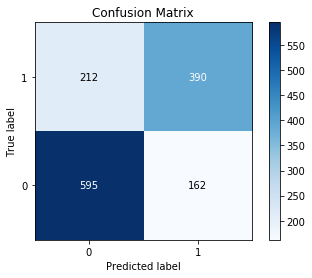

In [76]:
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test,model_001.predict(X_test))
plt.ylim(-0.5,1.5);
plt.savefig("../reports/figures/modelling/logistic_regression_confusion_matrix.jpg",dpi=144)

In [19]:
print(classification_report(y_test,model_001.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       757
           1       0.71      0.65      0.68       602

    accuracy                           0.72      1359
   macro avg       0.72      0.72      0.72      1359
weighted avg       0.72      0.72      0.72      1359



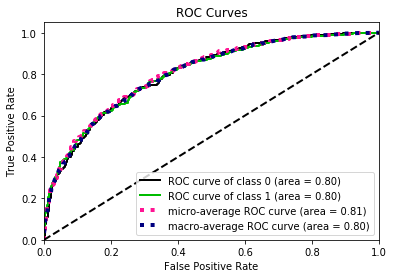

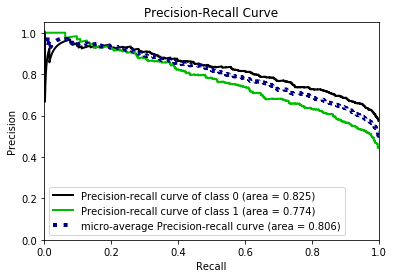

In [81]:
skplt.metrics.plot_roc_curve(y_test,model_001.predict_proba(X_test))
plt.savefig("../reports/figures/modelling/logistic_regression_roc_curves.jpg",dpi=144)
skplt.metrics.plot_precision_recall_curve(y_test,model_001.predict_proba(X_test))
plt.savefig("../reports/figures/modelling/logistic_regression_pr_curves.jpg",dpi=144);

### Decision Tree

In [18]:
#Running model with DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_depth=2,random_state=0)
d_tree = model_run(d_tree,X_train,y_train,X_test,y_test)

#Specifying GridSearch parameters
params = {'decisiontreeclassifier__class_weight': [None,'balanced'],
 'decisiontreeclassifier__criterion': ['gini','entropy'],
 'decisiontreeclassifier__max_depth': range(2,10),
 'decisiontreeclassifier__max_features': [None],
 'decisiontreeclassifier__max_leaf_nodes': [None],
 'decisiontreeclassifier__min_impurity_decrease': [0.0],
 'decisiontreeclassifier__min_impurity_split': [None],
 'decisiontreeclassifier__min_samples_leaf': [1],
 'decisiontreeclassifier__min_samples_split': [2],
 'decisiontreeclassifier__min_weight_fraction_leaf': [0.0],
 'decisiontreeclassifier__presort': [False],
 'decisiontreeclassifier__random_state': [0],
 'decisiontreeclassifier__splitter': ['best']}


Training score: 0.682
Testing score: 0.685
CrossVal score: 0.675


In [21]:
grid_d_tree = GridSearchCV(d_tree,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

In [22]:
grid_d_tree.fit(X_train,y_train)
joblib.dump(grid_d_tree, '../models/decision_tree_model')

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   25.4s finished


['../models/decision_tree_model']

In [21]:
model_002 = joblib.load('../models/decision_tree_model')
model_002.best_score_

0.6868555386697976

(-0.5, 1.5)

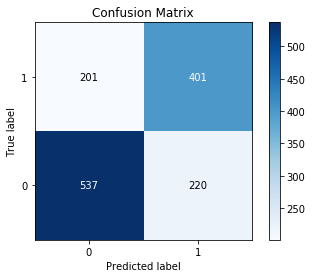

In [22]:
plot_confusion_matrix(y_test,model_002.predict(X_test))
plt.ylim(-0.5,1.5)

In [23]:
print(classification_report(y_test,model_002.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       757
           1       0.65      0.67      0.66       602

    accuracy                           0.69      1359
   macro avg       0.69      0.69      0.69      1359
weighted avg       0.69      0.69      0.69      1359



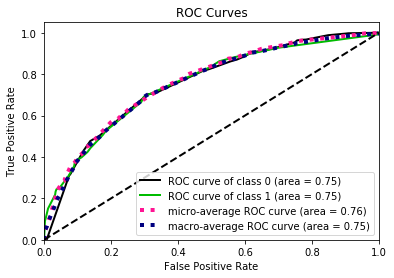

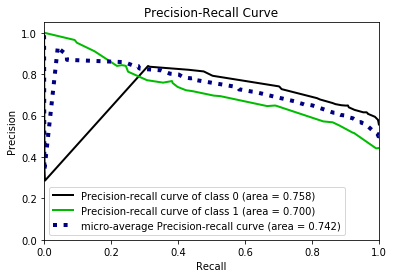

In [24]:
skplt.metrics.plot_roc_curve(y_test,model_002.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_002.predict_proba(X_test));

### Gaussian Naive Bayes

In [27]:
#Running model with DecisionTreeClassifier
gaus_nb =GaussianNB()
gaus_nb = model_run(gaus_nb,X_train,y_train,X_test,y_test)

Training score: 0.686
Testing score: 0.692
CrossVal score: 0.686


In [28]:
joblib.dump(gaus_nb, '../models/gaussian_naivebayes_model')

In [25]:
model_003 = joblib.load('../models/gaussian_naivebayes_model')

(-0.5, 1.5)

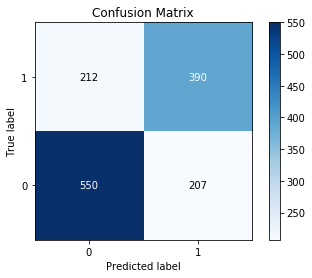

In [26]:
plot_confusion_matrix(y_test,model_003.predict(X_test))
plt.ylim(-0.5,1.5)

In [27]:
print(classification_report(y_test,model_003.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       757
           1       0.65      0.65      0.65       602

    accuracy                           0.69      1359
   macro avg       0.69      0.69      0.69      1359
weighted avg       0.69      0.69      0.69      1359



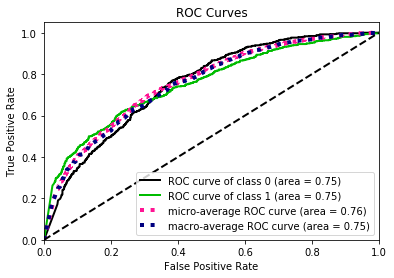

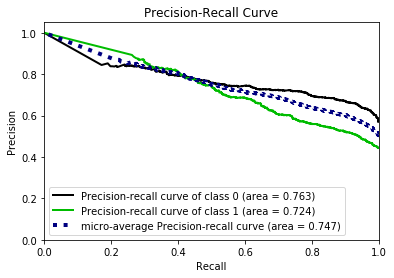

In [28]:
skplt.metrics.plot_roc_curve(y_test,model_003.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_003.predict_proba(X_test));

### Support Vectors (Linear Model)

In [32]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state=0)

In [34]:
linear_svc = model_run(linear_svc,X_train,y_train,X_test,y_test)

Training score: 0.734
Testing score: 0.720
CrossVal score: 0.715


In [38]:
linear_svc.named_steps['linearsvc']

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [40]:
params = {'linearsvc__C': np.logspace(-1,1,10),
 'linearsvc__class_weight': [None,'balanced'],
 'linearsvc__dual': [True],
 'linearsvc__fit_intercept': [True],
 'linearsvc__intercept_scaling': [1],
 'linearsvc__loss': ['squared_hinge'],
 'linearsvc__multi_class': ['ovr'],
 'linearsvc__penalty': ['l2']}

In [41]:
grid_d_linsvc = GridSearchCV(linear_svc,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_d_linsvc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('linearsvc',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2', random_state=0,
                                                  tol=0.0001, verbose=0))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'linearsvc__C': array([ 0...
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ]),
                         'linearsvc__class_weight': [None,

In [42]:
joblib.dump(grid_d_linsvc, '../models/linear_svm_model')

['../models/linear_svm_model']

In [29]:
model_004 = joblib.load('../models/linear_svm_model')
model_004.best_score_

0.7170442243083758

(-0.5, 1.5)

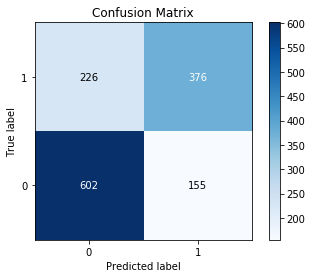

In [281]:
plot_confusion_matrix(y_test,model_004.predict(X_test))
plt.ylim(-0.5,1.5)

In [282]:
print(classification_report(y_test,model_004.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       757
           1       0.71      0.62      0.66       602

    accuracy                           0.72      1359
   macro avg       0.72      0.71      0.71      1359
weighted avg       0.72      0.72      0.72      1359



### Support Vectors (Radial Based)

In [288]:
#Running model with SVM
svc = SVC(random_state=0)
svc = model_run(svc,X_train,y_train,X_test,y_test)

Training score: 0.777
Testing score: 0.723
CrossVal score: 0.712


In [289]:
svc.named_steps['svc']

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [291]:
#Specifying GridSearch parameters
params = {'svc__C': np.logspace(-1,1,10),
 'svc__class_weight': [None,'balanced'],
 'svc__coef0': [0.0],
 'svc__decision_function_shape': ['ovr'],
 'svc__degree': [3],
 'svc__gamma': ['auto'],
 'svc__kernel': ['rbf'],
 'svc__max_iter': [-1],
 'svc__probability': [True],
 'svc__random_state': [0],
 'svc__shrinking': [True],
 'svc__tol': [0.001],
 'svc__verbose': [1]}


In [292]:
grid_d_svc = GridSearchCV(svc,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_d_svc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.2min finished


[LibSVM]

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=0,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_...
                         'svc__class_weight': [None, 'balanced'],
                         'svc__coef0': [0.0],
                 

In [293]:
joblib.dump(grid_d_svc, '../models/rbf_svm_model')

['../models/rbf_svm_model']

In [294]:
model_004a = joblib.load('../models/rbf_svm_model')
model_004a.best_score_

0.7150194581535338

In [295]:
model_004a.best_params_

{'svc__C': 2.1544346900318834,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': True,
 'svc__random_state': 0,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': 1}

(-0.5, 1.5)

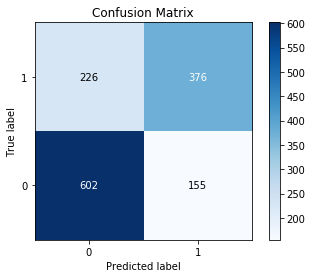

In [296]:
plot_confusion_matrix(y_test,model_004.predict(X_test))
plt.ylim(-0.5,1.5)

In [297]:
print(classification_report(y_test,model_004.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       757
           1       0.71      0.62      0.66       602

    accuracy                           0.72      1359
   macro avg       0.72      0.71      0.71      1359
weighted avg       0.72      0.72      0.72      1359



### K Nearest Neighbours

In [44]:
knn = KNeighborsClassifier()
knn = model_run(knn,X_train,y_train,X_test,y_test)

Training score: 0.781
Testing score: 0.684
CrossVal score: 0.670


In [45]:
#Specifying GridSearch parameters
params = {'kneighborsclassifier__algorithm': ['auto'],
 'kneighborsclassifier__leaf_size': [30],
 'kneighborsclassifier__metric': ['minkowski'],
 'kneighborsclassifier__metric_params': [None],
 'kneighborsclassifier__n_jobs': [-1],
 'kneighborsclassifier__n_neighbors': range(2,10),
 'kneighborsclassifier__p': [2],
 'kneighborsclassifier__weights': ['uniform']}

In [46]:
grid_knn = GridSearchCV(knn,param_grid=params,cv=5,scoring='accuracy',verbose=1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   23.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kneighborsclassifier__algorithm': ['auto'],
                         'kneighborsclas..._size': [30],
                         'kneighborsclassifier__metric': ['minkowski'],
          

In [47]:
joblib.dump(grid_knn, '../models/knn_model')

['../models/knn_model']

In [30]:
model_005 = joblib.load('../models/knn_model')
model_005.best_score_

0.6824325995652623

In [31]:
model_005.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': -1,
 'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

(-0.5, 1.5)

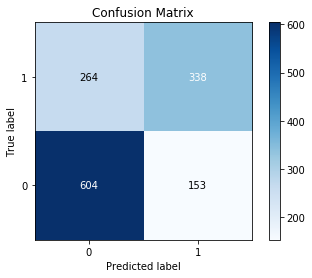

In [32]:
plot_confusion_matrix(y_test,model_005.predict(X_test))
plt.ylim(-0.5,1.5)

In [33]:
print(classification_report(y_test,model_005.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74       757
           1       0.69      0.56      0.62       602

    accuracy                           0.69      1359
   macro avg       0.69      0.68      0.68      1359
weighted avg       0.69      0.69      0.69      1359



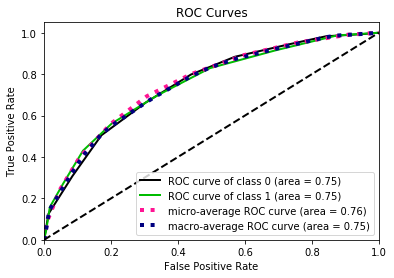

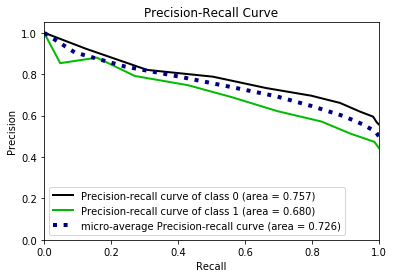

In [34]:
skplt.metrics.plot_roc_curve(y_test,model_005.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_005.predict_proba(X_test));

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [42]:
rforest = RandomForestClassifier(max_depth=10,n_estimators=1000,n_jobs=-1)
rforest = model_run(rforest,X_train,y_train,X_test,y_test)

Training score: 0.929
Testing score: 0.709
CrossVal score: 0.713


In [43]:
rforest.named_steps.randomforestclassifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [45]:
#Specifying GridSearch parameters
params = {'randomforestclassifier__criterion': ['gini','entropy'],
 'randomforestclassifier__max_depth': [10],
 'randomforestclassifier__max_features': ['auto'],
 'randomforestclassifier__max_leaf_nodes': [None],
 'randomforestclassifier__min_impurity_decrease': [0.0],
 'randomforestclassifier__min_impurity_split': [None],
 'randomforestclassifier__min_samples_leaf': [1],
 'randomforestclassifier__min_samples_split': [2],
 'randomforestclassifier__min_weight_fraction_leaf': [0.0],
 'randomforestclassifier__random_state': [0],
 'randomforestclassifier__verbose': [2]}

In [46]:
grid_rforest = GridSearchCV(rforest,param_grid=params,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_rforest.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000building tree 4 of 1000

building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000building tree 16 of 1000

building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000building tree 26 of 1000

building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.1s



building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000building tree 70 of 1000

building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.7s


building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000building tree 191 of 1000

building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   12.2s



building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   21.0s


building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tre

building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000building tree 984 of 1000
building tree 985 of 1000

building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=10,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                             

In [47]:
joblib.dump(grid_rforest, '../models/random_forest_model')

['../models/random_forest_model']

In [105]:
model_006 = joblib.load('../models/random_forest_model')
model_006.best_score_

0.715019966420496

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


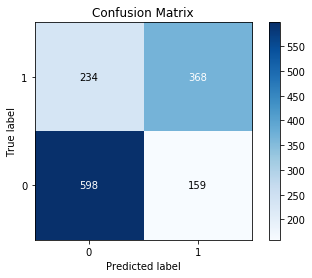

In [287]:
plot_confusion_matrix(y_test,model_006.predict(X_test))
plt.ylim(-0.5,1.5)
plt.savefig("confusion_rforest.jpg",dpi=800)

In [51]:
print(classification_report(y_test,model_006.predict(X_test)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.72      0.79      0.75       757
           1       0.70      0.61      0.65       602

    accuracy                           0.71      1359
   macro avg       0.71      0.70      0.70      1359
weighted avg       0.71      0.71      0.71      1359



[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.1s finished


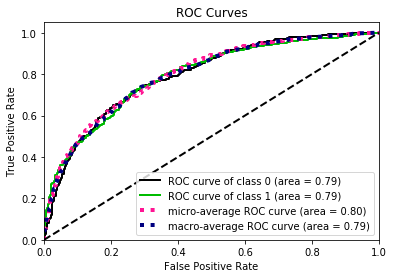

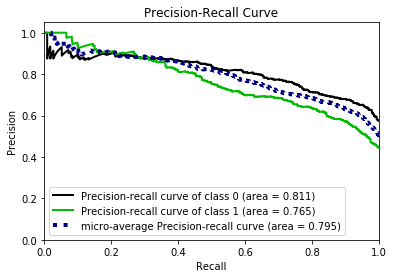

In [52]:
skplt.metrics.plot_roc_curve(y_test,model_006.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_006.predict_proba(X_test));

### Neural Network

In [53]:
from sklearn.neural_network import MLPClassifier

In [216]:
nnet = MLPClassifier(solver='lbfgs',
                    alpha=10**(2),
                    hidden_layer_sizes=(55,35,15,5),
                    activation='relu',
                    random_state=0,
                    batch_size='auto',
                     early_stopping = True, n_iter_no_change=30)

In [217]:
nnet = model_run(nnet,X_train,y_train,X_test,y_test)

Training score: 0.803
Testing score: 0.717
CrossVal score: 0.671


In [91]:
nnet.named_steps['mlpclassifier']

MLPClassifier(activation='relu', alpha=100, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(55, 35, 15, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=30, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [245]:
params = {'mlpclassifier__activation': ['relu'],
 'mlpclassifier__alpha': [100],
 'mlpclassifier__batch_size': ['auto'],
 'mlpclassifier__beta_1': [0.9],
 'mlpclassifier__beta_2': [0.999],
 'mlpclassifier__early_stopping': [True],
 'mlpclassifier__epsilon': [1e-08],
 'mlpclassifier__hidden_layer_sizes': [(100,45,15,1),(100,35,15,1)],
 'mlpclassifier__learning_rate': ['constant'],
 'mlpclassifier__learning_rate_init': [0.001],
 'mlpclassifier__max_fun': [15000],
 'mlpclassifier__max_iter': [200],
 'mlpclassifier__momentum': [0.9],
 'mlpclassifier__n_iter_no_change': [30],
 'mlpclassifier__nesterovs_momentum': [True],
 'mlpclassifier__power_t': [0.5],
 'mlpclassifier__shuffle': [True],
 'mlpclassifier__solver': ['lbfgs'],
 'mlpclassifier__tol': [0.0001]}

In [246]:
grid_neural = GridSearchCV(nnet,param_grid=params,scoring='accuracy',verbose=1,n_jobs=-1)

In [247]:
grid_neural.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('mlpclassifier',
                                        MLPClassifier(activation='relu',
                                                      alpha=100,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=True,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(55,
                                                                          35,
                                                                          15,
                                                                          5),
                                                      learning_rate='constant',
                                

In [248]:
joblib.dump(grid_neural, '../models/neural_network_model')

['../models/neural_network_model']

In [249]:
model_007 = joblib.load('../models/neural_network_model')
model_007.best_score_

0.7159384048210816

(-0.5, 1.5)

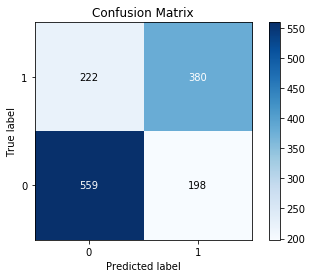

In [251]:
plot_confusion_matrix(y_test,model_007.predict(X_test))
plt.ylim(-0.5,1.5)

In [252]:
print(classification_report(y_test,model_007.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       757
           1       0.66      0.63      0.64       602

    accuracy                           0.69      1359
   macro avg       0.69      0.68      0.69      1359
weighted avg       0.69      0.69      0.69      1359



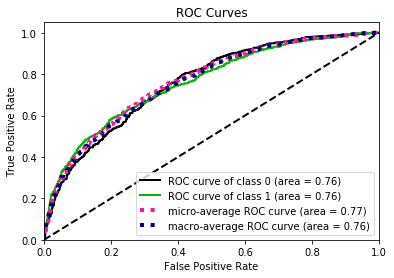

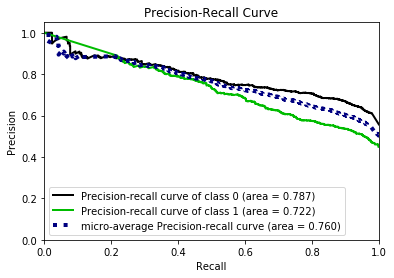

In [253]:
skplt.metrics.plot_roc_curve(y_test,model_007.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_007.predict_proba(X_test));

### Boosting Models

In [77]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,learning_rate=0.1,random_state=0)

ada = model_run(ada,X_train,y_train,X_test,y_test)

Training score: 0.748
Testing score: 0.706
CrossVal score: 0.711


In [264]:
gradient_boost = GradientBoostingClassifier(max_depth=2,
    n_estimators=100, learning_rate=0.1, random_state=0)

gradient_boost = model_run(gradient_boost, X_train, y_train, X_test, y_test)

Training score: 0.746
Testing score: 0.720
CrossVal score: 0.712


Tuning the AdaBoost based on preliminary scores

In [272]:
params = {'gradientboostingclassifier__ccp_alpha': [0.0],
          'gradientboostingclassifier__n_estimators': [100,200,300],
 'gradientboostingclassifier__criterion': ['friedman_mse','mse'],
 'gradientboostingclassifier__loss': ['deviance','exponential']}

In [273]:
grid_gradient = GridSearchCV(gradient_boost, param_grid=params,
                        scoring='accuracy', verbose=1, n_jobs=-1)

In [274]:
grid_gradient.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('gradientboostingclassifier',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=2,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impu

In [275]:
joblib.dump(grid_gradient, '../models/gradient_boost_model')

['../models/gradient_boost_model']

In [276]:
model_008 = joblib.load('../models/gradient_boost_model')
model_008.best_score_

0.7120772701320308

In [277]:
model_008.best_params_

{'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__n_estimators': 100}

(-0.5, 1.5)

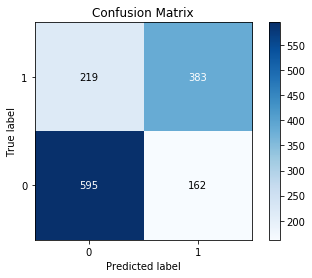

In [278]:
plot_confusion_matrix(y_test,model_008.predict(X_test))
plt.ylim(-0.5,1.5)

In [279]:
print(classification_report(y_test,model_008.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       757
           1       0.70      0.64      0.67       602

    accuracy                           0.72      1359
   macro avg       0.72      0.71      0.71      1359
weighted avg       0.72      0.72      0.72      1359



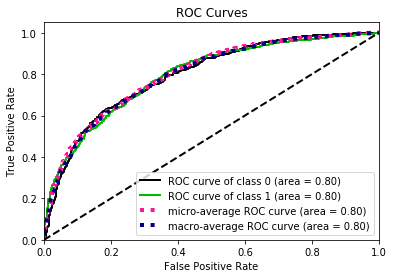

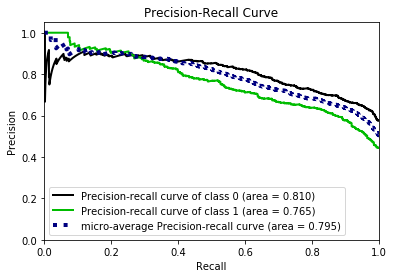

In [280]:
skplt.metrics.plot_roc_curve(y_test,model_008.predict_proba(X_test))
skplt.metrics.plot_precision_recall_curve(y_test,model_008.predict_proba(X_test));